In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SBI_Life_insurance.csv')

# Information of data


age : age of policyholder 

sex: gender of policy holder (female=0, male=1) 

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 steps: average walking steps per day of policyholder 

children: number of children / dependents of policyholder 

smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)

charges: individual medical costs billed by health insurance 

insuranceclaim: yes=1, no=0

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df.shape

(1338, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


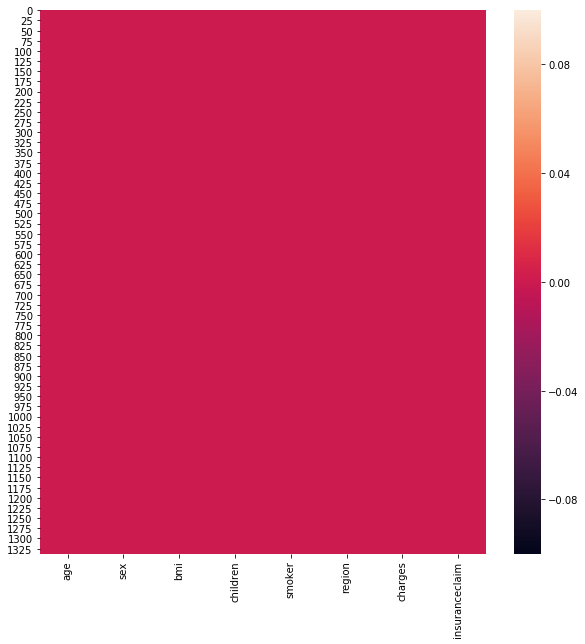

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isnull())

In [7]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024308712A58>,
      dtype=object)

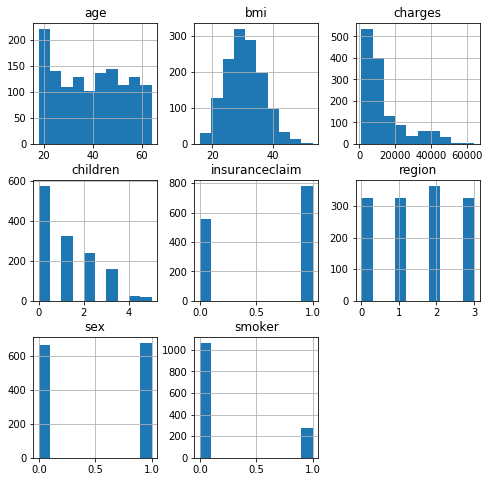

In [8]:
df.hist(figsize=(8,8))

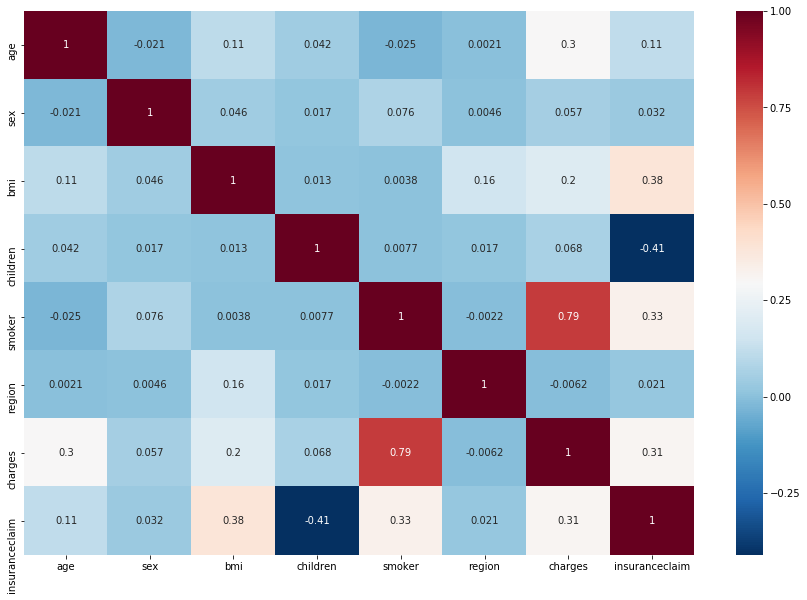

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True,cmap="RdBu_r")

In [10]:
df['insuranceclaim'].value_counts().sort_index()

0    555
1    783
Name: insuranceclaim, dtype: int64

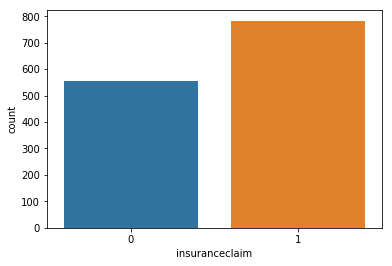

In [11]:
sns.countplot(df['insuranceclaim'])

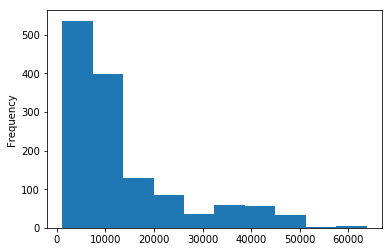

In [12]:
df['charges'].plot.hist()

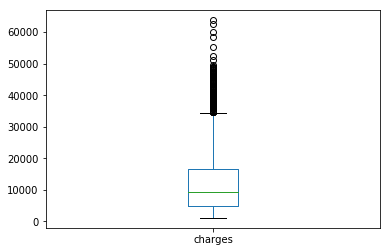

In [13]:
df['charges'].plot.box()

In [14]:
from scipy.stats import boxcox
df['charges']=boxcox(df['charges'],0)

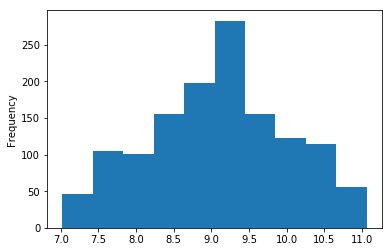

In [15]:
df['charges'].plot.hist()

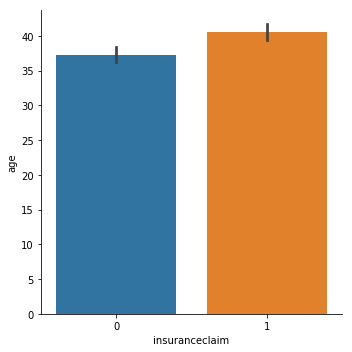

In [16]:
sns.catplot(x='insuranceclaim',y='age',data=df,kind='bar')

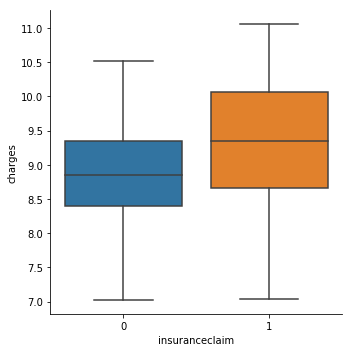

In [17]:
sns.catplot(x='insuranceclaim',y='charges',data=df,kind='box')

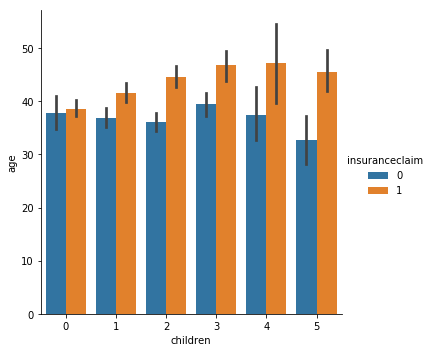

In [18]:
sns.catplot(x='children',y='age',hue='insuranceclaim',data=df,kind='bar')

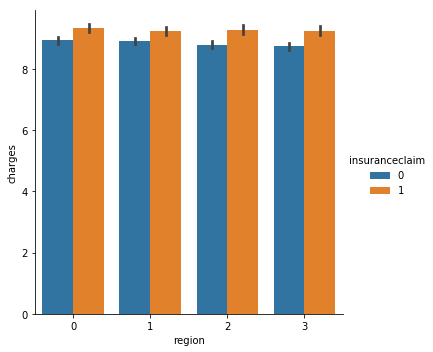

In [19]:
sns.catplot(x='region',y='charges',hue='insuranceclaim',data=df,kind='bar')

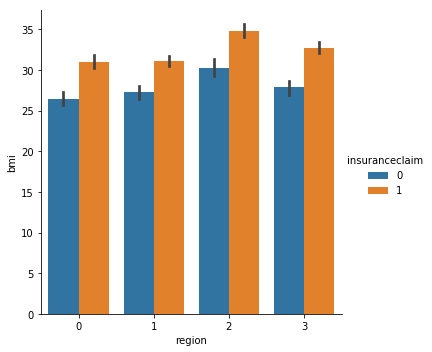

In [20]:
sns.catplot(x='region',y='bmi',hue='insuranceclaim',data=df,kind='bar')

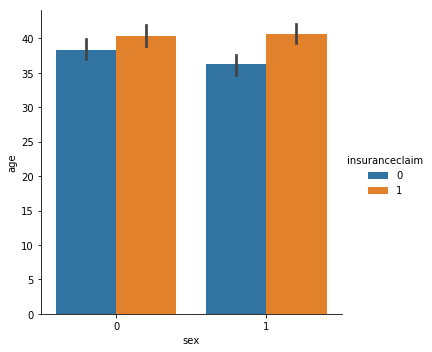

In [21]:
sns.catplot(x='sex',y='age',hue='insuranceclaim',data=df,kind='bar')

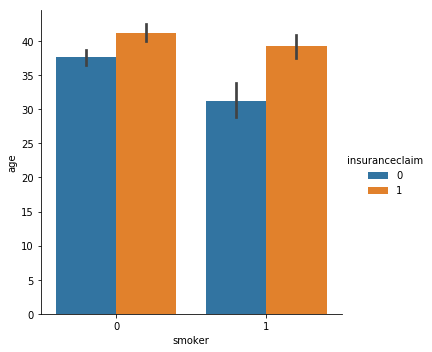

In [22]:
sns.catplot(x='smoker',y='age',hue='insuranceclaim',data=df,kind='bar')

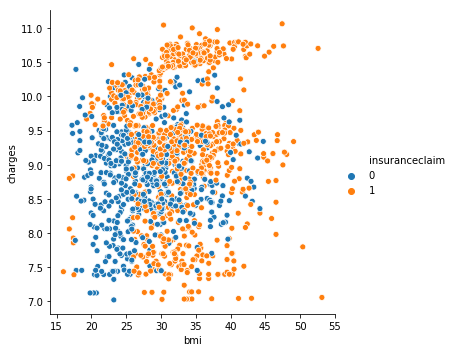

In [23]:
sns.relplot(x='bmi',y='charges',hue='insuranceclaim',data=df)

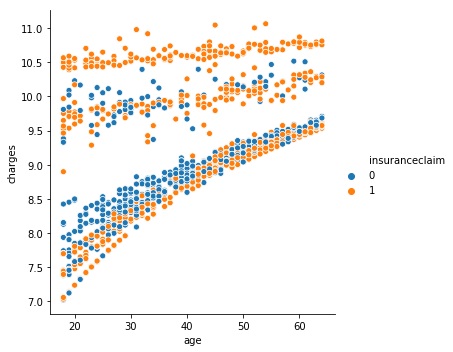

In [24]:
sns.relplot(x='age',y='charges',hue='insuranceclaim',data=df)

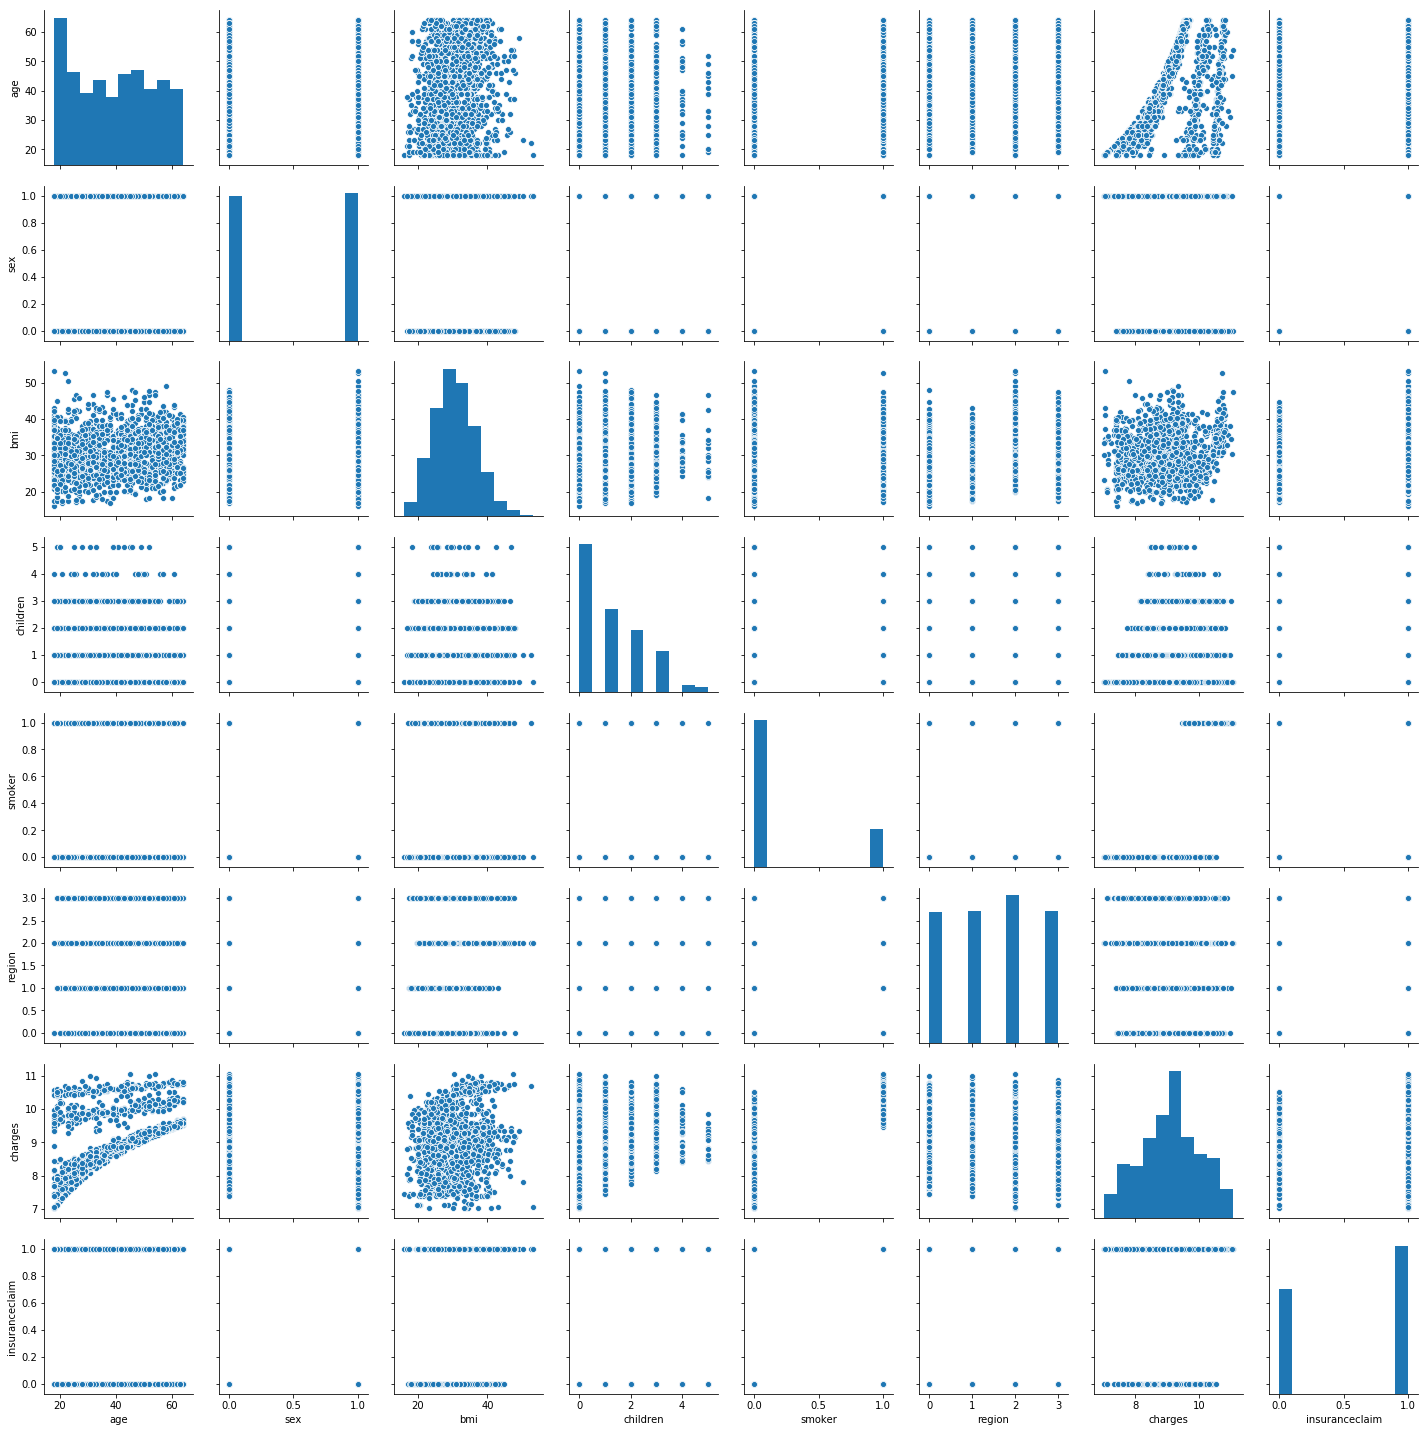

In [25]:
sns.pairplot(df)

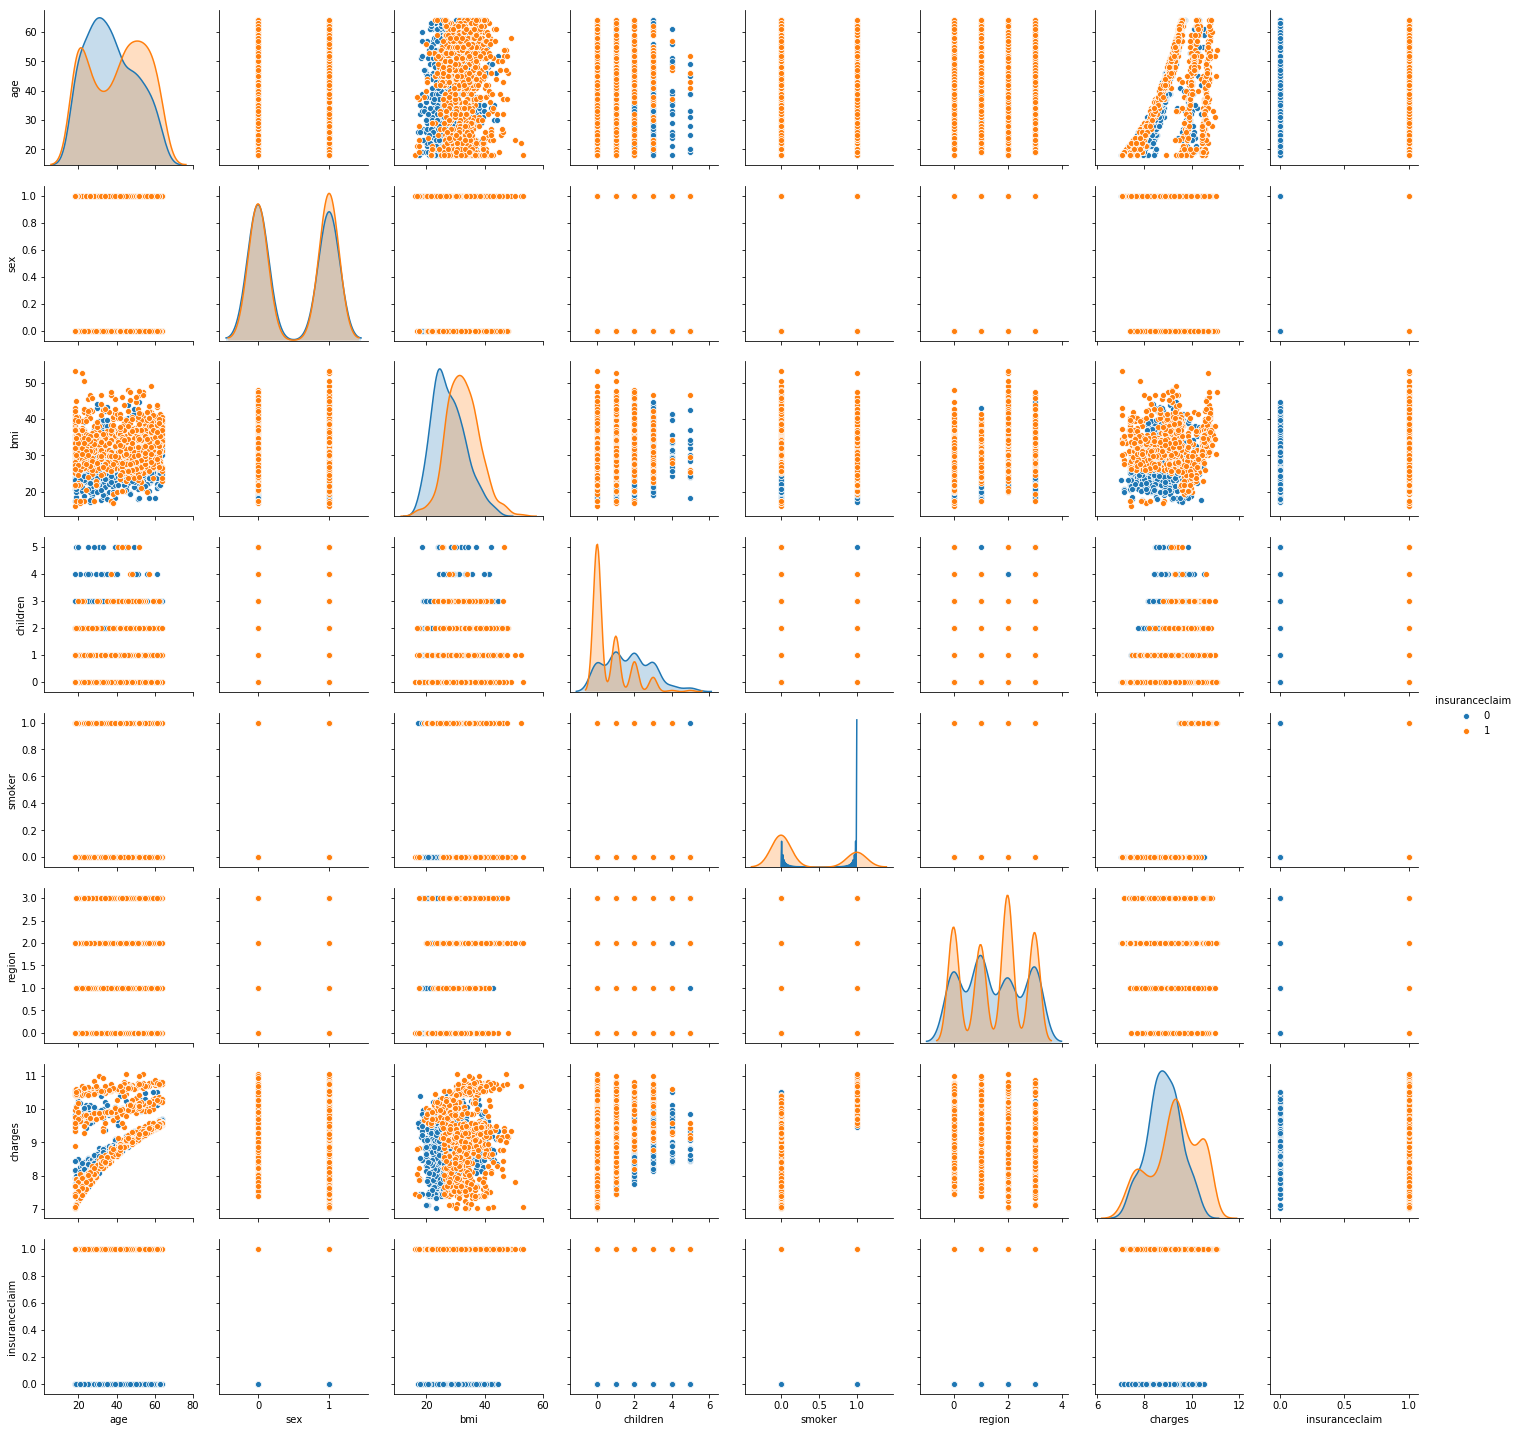

In [26]:
sns.pairplot(df,hue='insuranceclaim')

In [27]:
x=df.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [29]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=97,stratify=y)

In [31]:
x_train.shape,x_test.shape

((1070, 7), (268, 7))

In [32]:
y_train.shape,y_test.shape

((1070,), (268,))

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score,f1_score,precision_score

# LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
lr.score(x_test,y_test)

0.917910447761194

array([[ 99,  12],
       [ 10, 147]], dtype=int64)

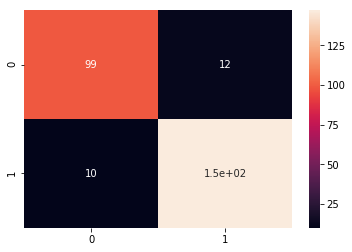

In [35]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=10,scoring='accuracy')
score.mean()

0.8833987954962031

In [37]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       111
           1       0.92      0.94      0.93       157

   micro avg       0.92      0.92      0.92       268
   macro avg       0.92      0.91      0.92       268
weighted avg       0.92      0.92      0.92       268



In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9140988121879842


Text(0.5, 0, 'False Positive Rate')

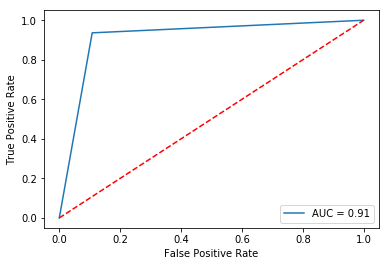

In [39]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# GaussianNB

In [40]:
from sklearn.naive_bayes import GaussianNB
Gb=GaussianNB()
Gb.fit(x_train,y_train)
pre=Gb.predict(x_test)
Gb.score(x_test,y_test)

0.8246268656716418

In [41]:
score=cross_val_score(Gb,x,y,cv=10,scoring='accuracy')
score.mean()

0.7870588161947156

array([[ 97,  14],
       [ 33, 124]], dtype=int64)

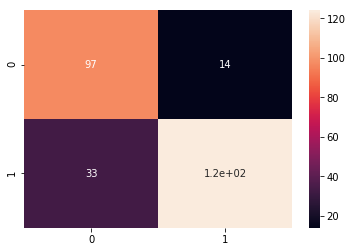

In [42]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [43]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       111
           1       0.90      0.79      0.84       157

   micro avg       0.82      0.82      0.82       268
   macro avg       0.82      0.83      0.82       268
weighted avg       0.84      0.82      0.83       268



In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.831841395535663


Text(0.5, 0, 'False Positive Rate')

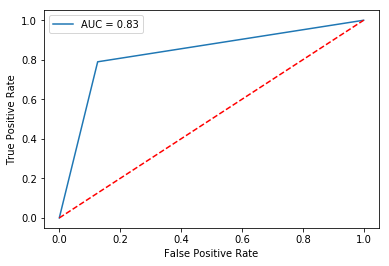

In [45]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier(random_state=56)
Dt.fit(x_train,y_train)
pre=Dt.predict(x_test)
Dt.score(x_test,y_test)

1.0

In [47]:
score=cross_val_score(Dt,x,y,cv=10)
score.mean()

0.9805629330374026

array([[111,   0],
       [  0, 157]], dtype=int64)

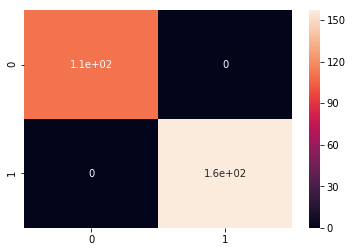

In [48]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [49]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       157

   micro avg       1.00      1.00      1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

1.0


Text(0.5, 0, 'False Positive Rate')

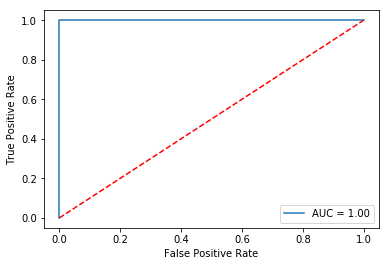

In [51]:
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
knn.score(x_test,y_test)

0.9216417910447762

In [53]:
score=cross_val_score(knn,x,y,cv=10)
score.mean()

0.8849415828127531

array([[101,  10],
       [ 11, 146]], dtype=int64)

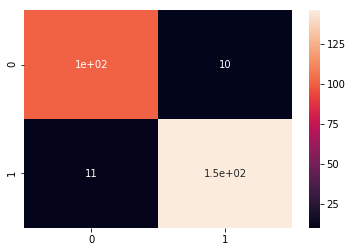

In [54]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [55]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       111
           1       0.94      0.93      0.93       157

   micro avg       0.92      0.92      0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268



In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9199231078211971


Text(0.5, 0, 'False Positive Rate')

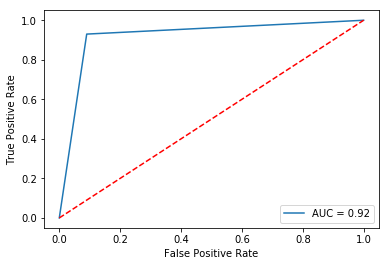

In [57]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# support vector machine

In [58]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
pre=sv.predict(x_test)
sv.score(x_test,y_test)

0.9328358208955224

In [59]:
score=cross_val_score(sv,x,y,cv=10)
score.mean()

0.9036047415387557

array([[104,   7],
       [ 11, 146]], dtype=int64)

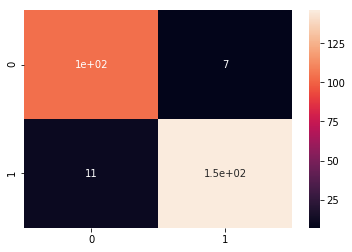

In [60]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [61]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       111
           1       0.95      0.93      0.94       157

   micro avg       0.93      0.93      0.93       268
   macro avg       0.93      0.93      0.93       268
weighted avg       0.93      0.93      0.93       268



In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9334366213347105


Text(0.5, 0, 'False Positive Rate')

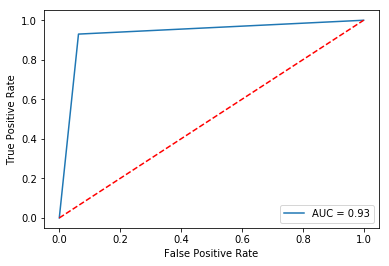

In [63]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# GradientBoostingClassifier

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pre=GBC.predict(x_test)
GBC.score(x_test,y_test)

0.9813432835820896

In [65]:
score=cross_val_score(GBC,x,y,cv=10)
score

array([0.99259259, 0.98518519, 0.99259259, 0.98507463, 0.96268657,
       0.98496241, 0.9924812 , 1.        , 0.96240602, 0.98496241])

array([[110,   1],
       [  4, 153]], dtype=int64)

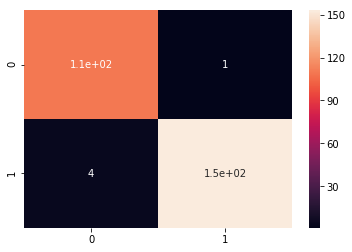

In [66]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [67]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       111
           1       0.99      0.97      0.98       157

   micro avg       0.98      0.98      0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [68]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9827566419923108


Text(0.5, 0, 'False Positive Rate')

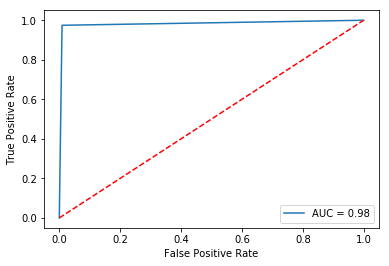

In [69]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pre=RFC.predict(x_test)
RFC.score(x_test,y_test)

0.9701492537313433

In [71]:
score=cross_val_score(RFC,x,y,cv=10)
score.mean()

0.9394438002136353

array([[108,   3],
       [  5, 152]], dtype=int64)

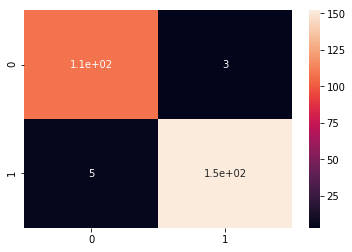

In [72]:
sns.heatmap(confusion_matrix(y_test,pre),annot=True)
confusion_matrix(y_test,pre)

In [73]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       111
           1       0.98      0.97      0.97       157

   micro avg       0.97      0.97      0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



In [74]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9705629196075057


Text(0.5, 0, 'False Positive Rate')

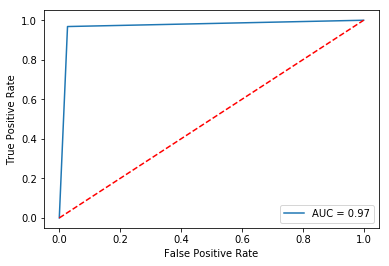

In [75]:
sns.lineplot(x=false_positive_rate,y=true_positive_rate,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [76]:
models = []
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=56)))
models.append(('GaussianNB', GaussianNB()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

In [77]:
Model = []
scores = []
f1score =[]
cvs=[]
Precisionscore = []
roc=[]
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    f1score.append(f1_score(y_test,y_pred))
    Precisionscore.append(precision_score(y_test,y_pred))
    re = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    roc.append(roc_auc_score(y_test,y_pred))
    cvs.append(re)
    Model.append(name)
result = pd.DataFrame({'Model': Model, 'Accuracy_score': scores ,'F1_score': f1score,'Precision_score': Precisionscore,'Cross_val_score':cvs,'Roc_auc_score':roc})
result

,Model,Accuracy_score,F1_score,Precision_score,Cross_val_score,Roc_auc_score
0,KNeighborsClassifier,0.921642,0.932907,0.935897,0.884942,0.919923
1,SVC,0.932836,0.941935,0.954248,0.903605,0.933437
2,LogisticRegression,0.917910,0.930380,0.924528,0.883399,0.914099
3,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.980563,1.000000
4,GaussianNB,0.824627,0.840678,0.898551,0.787059,0.831841
5,RandomForestClassifier,0.988806,0.990476,0.987342,0.952136,0.987806
6,GradientBoostingClassifier,0.981343,0.983923,0.993506,0.984294,0.982757


**GradientBoostingClassifier and DecisionTreeClassifier are working excellent on our dataset but I choose DecisionTreeClassifier as my final model because it has better Accuracy_score**

**Accuracy_score = 1.0**


**F1_score = 1.0**

**Precision_score = 1.0**

**Cross_val_score = 0.980563**

**Roc_auc_score = 1.0**

In [78]:
from sklearn.externals import joblib
joblib.dump(Dt,"Model_SBI_Life_insurance.csv")

['Model_SBI_Life_insurance.csv']

In [79]:
model=joblib.load("Model_SBI_Life_insurance.csv")

In [80]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)